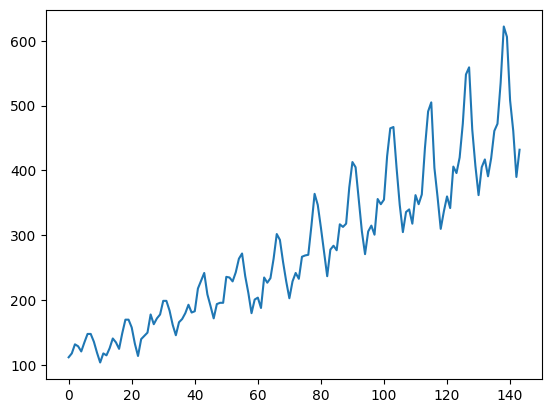

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('/kaggle/input/airline-passengers/airline-passengers.csv', usecols=[1], engine='python')

plt.plot(dataset)
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [4]:
# load the dataset
dataframe = pd.read_csv('/kaggle/input/airline-passengers/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 2s - 17ms/step - loss: 0.0227
Epoch 2/100
94/94 - 0s - 2ms/step - loss: 0.0100
Epoch 3/100
94/94 - 0s - 2ms/step - loss: 0.0083
Epoch 4/100
94/94 - 0s - 2ms/step - loss: 0.0075
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0066
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0058
Epoch 7/100
94/94 - 0s - 2ms/step - loss: 0.0051
Epoch 8/100
94/94 - 0s - 2ms/step - loss: 0.0044
Epoch 9/100
94/94 - 0s - 2ms/step - loss: 0.0038
Epoch 10/100
94/94 - 0s - 2ms/step - loss: 0.0033
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0029
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0026
Epoch 13/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 14/100
94/94 - 0s - 2ms/step - loss: 0.0023
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 16/100
94/94 - 0s - 2ms/step - loss: 0.0021
Epoch 17/100
94/94 - 0s - 2ms/step - loss: 0.0021
Epoch 18/100
94/94 - 0s - 2ms/step - loss: 0.0021
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0021
Epoch 20/100
94/94 - 0s - 2ms/step - loss: 0.0021
Epoch 21/100
94/94 -

In [11]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train Score: 22.79 RMSE
Test Score: 49.37 RMSE


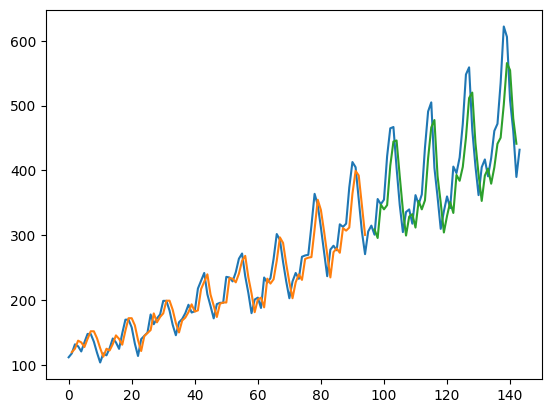

In [12]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# 1. Changing the seed value

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 2s - 16ms/step - loss: 0.0286
Epoch 2/100
94/94 - 0s - 2ms/step - loss: 0.0123
Epoch 3/100
94/94 - 0s - 2ms/step - loss: 0.0102
Epoch 4/100
94/94 - 0s - 2ms/step - loss: 0.0093
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0085
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0076
Epoch 7/100
94/94 - 0s - 2ms/step - loss: 0.0067
Epoch 8/100
94/94 - 0s - 2ms/step - loss: 0.0058
Epoch 9/100
94/94 - 0s - 2ms/step - loss: 0.0051
Epoch 10/100
94/94 - 0s - 2ms/step - loss: 0.0044
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0038
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0033
Epoch 13/100
94/94 - 0s - 2ms/step - loss: 0.0029
Epoch 14/100
94/94 - 0s - 2ms/step - loss: 0.0026
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 16/100
94/94 - 0s - 2ms/step - loss: 0.0023
Epoch 17/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 18/100
94/94 - 0s - 2ms/step - loss: 0.0021
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0021
Epoch 20/100
94/94 - 0s - 2ms/step - loss: 0.0021
Epoch 21/100
94/94 -

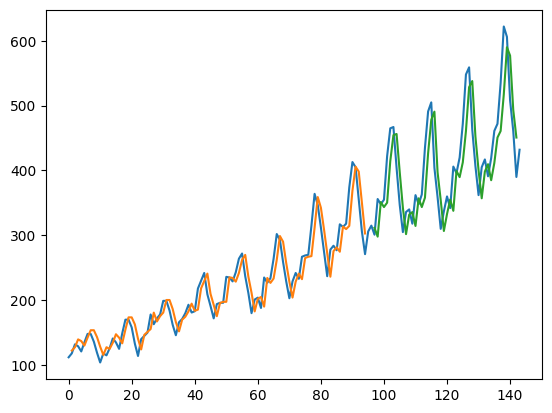

In [13]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(25)
# load the dataset
dataframe = read_csv('/kaggle/input/airline-passengers/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# 2. Adding more LSTM layers

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 3s - 28ms/step - loss: 0.0283
Epoch 2/100
94/94 - 0s - 2ms/step - loss: 0.0113
Epoch 3/100
94/94 - 0s - 2ms/step - loss: 0.0071
Epoch 4/100
94/94 - 0s - 2ms/step - loss: 0.0036
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0025
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 7/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 8/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 9/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 10/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 11/100
94/94 - 0s - 3ms/step - loss: 0.0024
Epoch 12/100
94/94 - 0s - 3ms/step - loss: 0.0024
Epoch 13/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 14/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 16/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 17/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 18/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 20/100
94/94 - 0s - 3ms/step - loss: 0.0024
Epoch 21/100
94/94 -

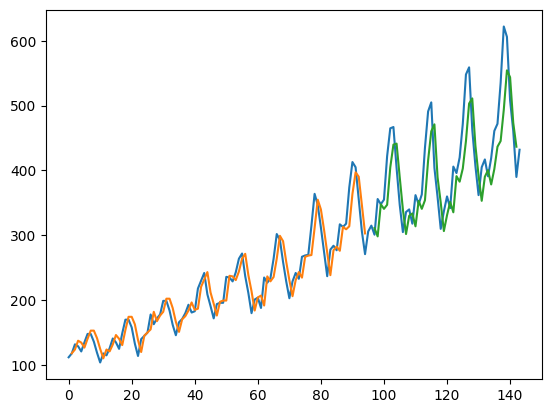

In [14]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('/kaggle/input/airline-passengers/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))                     # First LSTM layer
model.add(LSTM(25))                                                                        # Second LSTM layer
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# 3. Changing the lookback period

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 - 2s - 20ms/step - loss: 0.0464
Epoch 2/100
92/92 - 0s - 2ms/step - loss: 0.0211
Epoch 3/100
92/92 - 0s - 2ms/step - loss: 0.0132
Epoch 4/100
92/92 - 0s - 2ms/step - loss: 0.0111
Epoch 5/100
92/92 - 0s - 2ms/step - loss: 0.0098
Epoch 6/100
92/92 - 0s - 2ms/step - loss: 0.0087
Epoch 7/100
92/92 - 0s - 2ms/step - loss: 0.0076
Epoch 8/100
92/92 - 0s - 2ms/step - loss: 0.0066
Epoch 9/100
92/92 - 0s - 2ms/step - loss: 0.0058
Epoch 10/100
92/92 - 0s - 2ms/step - loss: 0.0051
Epoch 11/100
92/92 - 0s - 2ms/step - loss: 0.0046
Epoch 12/100
92/92 - 0s - 2ms/step - loss: 0.0043
Epoch 13/100
92/92 - 0s - 2ms/step - loss: 0.0040
Epoch 14/100
92/92 - 0s - 2ms/step - loss: 0.0038
Epoch 15/100
92/92 - 0s - 2ms/step - loss: 0.0037
Epoch 16/100
92/92 - 0s - 2ms/step - loss: 0.0036
Epoch 17/100
92/92 - 0s - 2ms/step - loss: 0.0035
Epoch 18/100
92/92 - 0s - 2ms/step - loss: 0.0035
Epoch 19/100
92/92 - 0s - 2ms/step - loss: 0.0035
Epoch 20/100
92/92 - 0s - 2ms/step - loss: 0.0034
Epoch 21/100
92/92 -

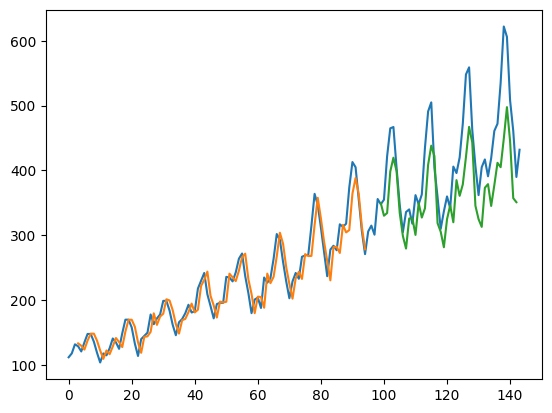

In [15]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('/kaggle/input/airline-passengers/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# 4. Using dropout layer

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 1s - 15ms/step - loss: 0.0412
Epoch 2/100
94/94 - 0s - 2ms/step - loss: 0.0215
Epoch 3/100
94/94 - 0s - 2ms/step - loss: 0.0151
Epoch 4/100
94/94 - 0s - 2ms/step - loss: 0.0133
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0123
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0113
Epoch 7/100
94/94 - 0s - 2ms/step - loss: 0.0103
Epoch 8/100
94/94 - 0s - 2ms/step - loss: 0.0092
Epoch 9/100
94/94 - 0s - 2ms/step - loss: 0.0081
Epoch 10/100
94/94 - 0s - 2ms/step - loss: 0.0070
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0060
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0050
Epoch 13/100
94/94 - 0s - 2ms/step - loss: 0.0042
Epoch 14/100
94/94 - 0s - 2ms/step - loss: 0.0035
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0030
Epoch 16/100
94/94 - 0s - 2ms/step - loss: 0.0026
Epoch 17/100
94/94 - 0s - 2ms/step - loss: 0.0023
Epoch 18/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0021
Epoch 20/100
94/94 - 0s - 2ms/step - loss: 0.0021
Epoch 21/100
94/94 -

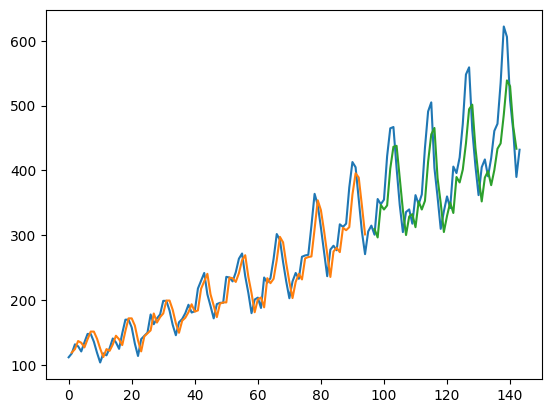

In [16]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Fix random seed for reproducibility
tf.random.set_seed(7)

# Load the dataset
dataframe = read_csv('/kaggle/input/airline-passengers/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict.reshape(-1, 1))  # Reshape to 2D
trainY = scaler.inverse_transform(np.array(trainY).reshape(-1, 1))    # Reshape to 2D
testPredict = scaler.inverse_transform(testPredict.reshape(-1, 1))    # Reshape to 2D
testY = scaler.inverse_transform(np.array(testY).reshape(-1, 1))      # Reshape to 2D

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# 5. Adding 1 Dense Layer

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 2s - 18ms/step - loss: 0.0470
Epoch 2/100
94/94 - 0s - 2ms/step - loss: 0.0220
Epoch 3/100
94/94 - 0s - 2ms/step - loss: 0.0178
Epoch 4/100
94/94 - 0s - 2ms/step - loss: 0.0167
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0155
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0141
Epoch 7/100
94/94 - 0s - 2ms/step - loss: 0.0123
Epoch 8/100
94/94 - 0s - 2ms/step - loss: 0.0100
Epoch 9/100
94/94 - 0s - 2ms/step - loss: 0.0076
Epoch 10/100
94/94 - 0s - 2ms/step - loss: 0.0053
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0036
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0027
Epoch 13/100
94/94 - 0s - 2ms/step - loss: 0.0023
Epoch 14/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 16/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 17/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 18/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 20/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 21/100
94/94 -

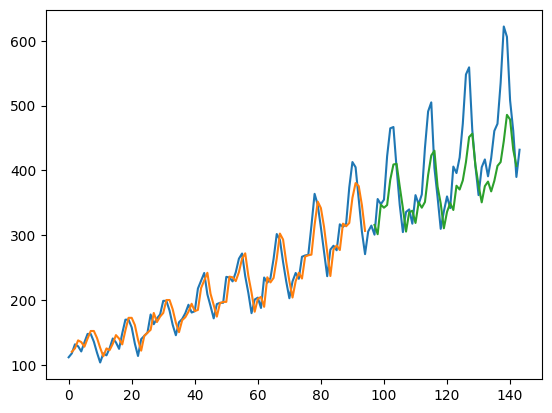

In [17]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
    
# fix random seed for reproducibility
tf.random.set_seed(7)

# load the dataset
dataframe = read_csv('/kaggle/input/airline-passengers/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(8, activation='relu'))   # Additional Dense layer

model.add(Dense(1))                      # Output layer
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# 6. Adding 2 Dense layers

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 2s - 22ms/step - loss: 0.0347
Epoch 2/100
94/94 - 0s - 2ms/step - loss: 0.0165
Epoch 3/100
94/94 - 0s - 2ms/step - loss: 0.0147
Epoch 4/100
94/94 - 0s - 2ms/step - loss: 0.0135
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0122
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0105
Epoch 7/100
94/94 - 0s - 2ms/step - loss: 0.0087
Epoch 8/100
94/94 - 0s - 2ms/step - loss: 0.0062
Epoch 9/100
94/94 - 0s - 2ms/step - loss: 0.0028
Epoch 10/100
94/94 - 0s - 2ms/step - loss: 0.0025
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0025
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 13/100
94/94 - 0s - 2ms/step - loss: 0.0023
Epoch 14/100
94/94 - 0s - 2ms/step - loss: 0.0023
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0023
Epoch 16/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 17/100
94/94 - 0s - 2ms/step - loss: 0.0023
Epoch 18/100
94/94 - 0s - 2ms/step - loss: 0.0023
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 20/100
94/94 - 0s - 2ms/step - loss: 0.0023
Epoch 21/100
94/94 -

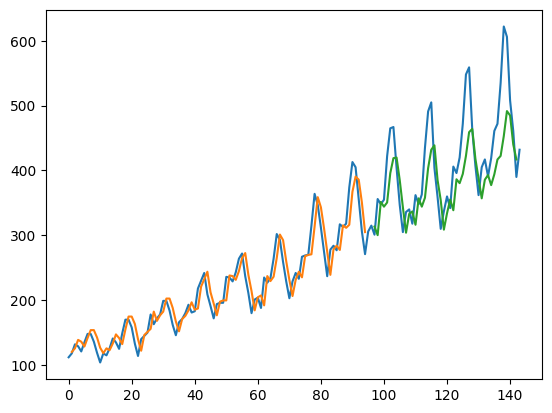

In [21]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
    
# fix random seed for reproducibility
tf.random.set_seed(7)

# load the dataset
dataframe = read_csv('/kaggle/input/airline-passengers/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(8, activation='relu'))   # Additional Dense layer
model.add(Dense(4, activation='relu'))   # Another Dense layer
model.add(Dense(1))                      # Output layer
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 - 1s - 15ms/step - loss: 0.0293
Epoch 2/100
92/92 - 0s - 2ms/step - loss: 0.0117
Epoch 3/100
92/92 - 0s - 2ms/step - loss: 0.0087
Epoch 4/100
92/92 - 0s - 2ms/step - loss: 0.0076
Epoch 5/100
92/92 - 0s - 1ms/step - loss: 0.0066
Epoch 6/100
92/92 - 0s - 2ms/step - loss: 0.0058
Epoch 7/100
92/92 - 0s - 1ms/step - loss: 0.0051
Epoch 8/100
92/92 - 0s - 1ms/step - loss: 0.0046
Epoch 9/100
92/92 - 0s - 2ms/step - loss: 0.0042
Epoch 10/100
92/92 - 0s - 2ms/step - loss: 0.0040
Epoch 11/100
92/92 - 0s - 2ms/step - loss: 0.0038
Epoch 12/100
92/92 - 0s - 1ms/step - loss: 0.0036
Epoch 13/100
92/92 - 0s - 1ms/step - loss: 0.0035
Epoch 14/100
92/92 - 0s - 1ms/step - loss: 0.0035
Epoch 15/100
92/92 - 0s - 1ms/step - loss: 0.0034
Epoch 16/100
92/92 - 0s - 2ms/step - loss: 0.0034
Epoch 17/100
92/92 - 0s - 2ms/step - loss: 0.0033
Epoch 18/100
92/92 - 0s - 2ms/step - loss: 0.0033
Epoch 19/100
92/92 - 0s - 1ms/step - loss: 0.0032
Epoch 20/100
92/92 - 0s - 1ms/step - loss: 0.0032
Epoch 21/100
92/92 -

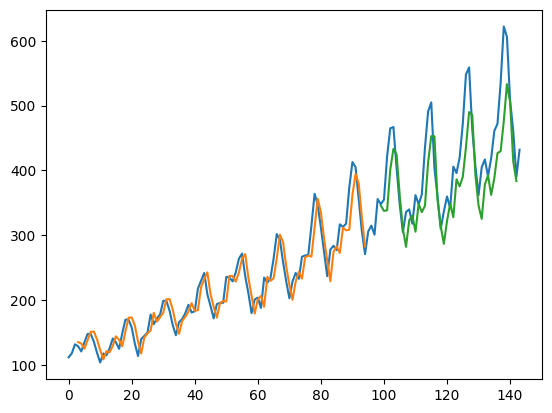

In [2]:
# LSTM for international airline passengers problem with window regression framing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('/kaggle/input/airline-passengers/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
82/82 - 2s - 19ms/step - loss: 0.0073
Epoch 2/100
82/82 - 0s - 2ms/step - loss: 0.0045
Epoch 3/100
82/82 - 0s - 2ms/step - loss: 0.0041
Epoch 4/100
82/82 - 0s - 2ms/step - loss: 0.0037
Epoch 5/100
82/82 - 0s - 2ms/step - loss: 0.0035
Epoch 6/100
82/82 - 0s - 2ms/step - loss: 0.0033
Epoch 7/100
82/82 - 0s - 2ms/step - loss: 0.0031
Epoch 8/100
82/82 - 0s - 2ms/step - loss: 0.0030
Epoch 9/100
82/82 - 0s - 2ms/step - loss: 0.0030
Epoch 10/100
82/82 - 0s - 2ms/step - loss: 0.0029
Epoch 11/100
82/82 - 0s - 2ms/step - loss: 0.0029
Epoch 12/100
82/82 - 0s - 2ms/step - loss: 0.0029
Epoch 13/100
82/82 - 0s - 2ms/step - loss: 0.0029
Epoch 14/100
82/82 - 0s - 2ms/step - loss: 0.0029
Epoch 15/100
82/82 - 0s - 2ms/step - loss: 0.0029
Epoch 16/100
82/82 - 0s - 2ms/step - loss: 0.0028
Epoch 17/100
82/82 - 0s - 2ms/step - loss: 0.0028
Epoch 18/100
82/82 - 0s - 2ms/step - loss: 0.0028
Epoch 19/100
82/82 - 0s - 2ms/step - loss: 0.0028
Epoch 20/100
82/82 - 0s - 2ms/step - loss: 0.0028
Epoch 21

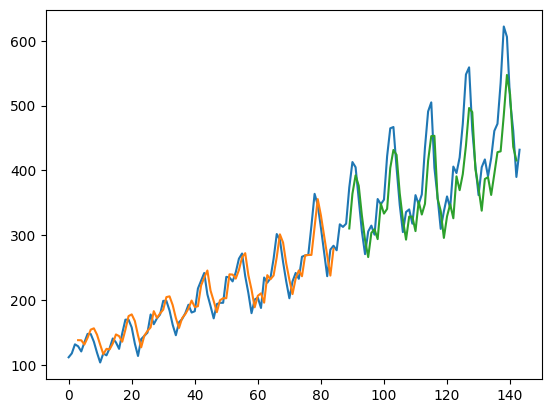

In [1]:
# LSTM for international airline passengers problem with time step regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('/kaggle/input/airline-passengers/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.60)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()